a) Generarea datelor

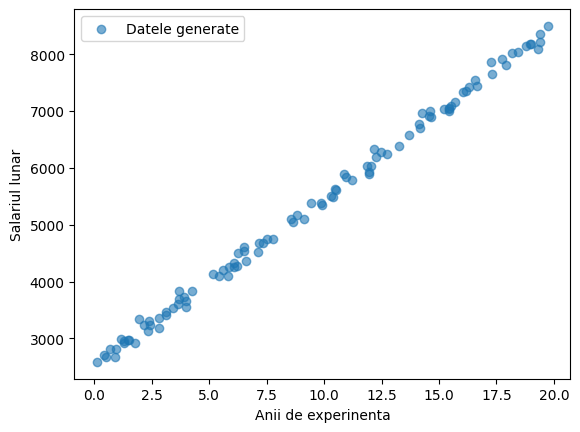

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  
# generarea anilor de experienta
x = np.random.uniform(0, 20, 100)

true_intercept = 2500  # salariul de baza
true_slope = 300      # valoarea de crestere per an de experienta
true_epsilon = 100       # zgomotul

# generarea salariului lunar
y = true_intercept + true_slope * x + np.random.normal(0, true_epsilon, size=100)

plt.scatter(x, y, alpha=0.6, label="Datele generate")
plt.xlabel("Anii de experinenta")
plt.ylabel("Salariul lunar")
plt.legend()
plt.show()

b) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 26 seconds.


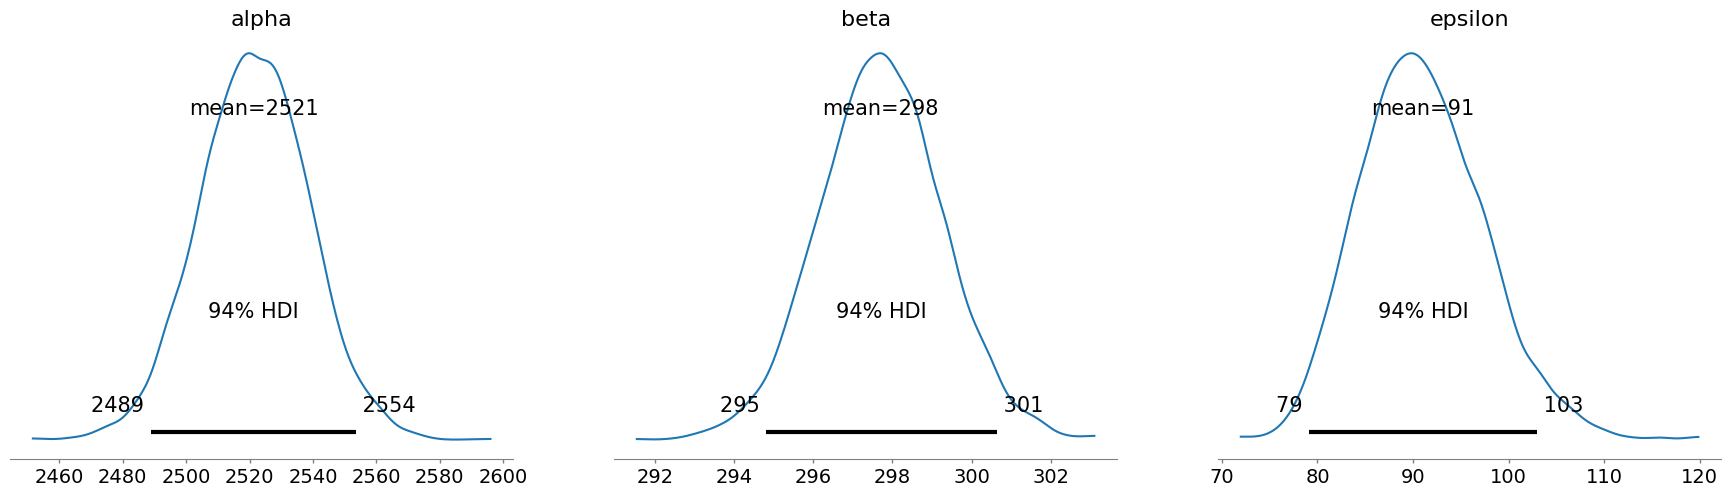

In [8]:
import pymc as pm
import arviz as az

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu = 0, sigma=2100)
    beta = pm.Normal('beta', mu=0, sigma=200)
    epsilon = pm.HalfCauchy('epsilon', 50)
    mu = pm.Deterministic('mu', alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y)

    idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)

# calculam intervalele de credibilitate 
alpha_hdi = az.hdi(idata_g.posterior["alpha"])
beta_hdi = az.hdi(idata_g.posterior["beta"])
epsilon_hdi = az.hdi(idata_g.posterior["epsilon"])

# vizualizare distributii posterioare
az.plot_posterior(idata_g, var_names=["alpha", "beta", "epsilon"])
plt.show()

In [9]:
az.summary(idata_g, var_names=['alpha', 'beta', 'epsilon'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2521.450,17.283,2488.816,2553.616,0.285,0.201,3688.0,3759.0,1.0
beta,297.706,1.556,294.815,300.646,0.026,0.018,3707.0,3760.0,1.0
epsilon,91.006,6.469,79.161,102.980,0.090,0.064,5252.0,4685.0,1.0


Inaintea de generarea datelor, am setat alpha 2500, iar prin inferenta Bayesiana, am obtinut 2521.
Beta a fost setat 300, iar prin inferenta Bayesiana am obtinut 297.
Epsilon a fost setat 100, iar prin inferenta Bayesiana am obtinut 91.

Se observa ca modelul a estimat destul de bine valorile reale.